In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import networkx as nx
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.animation as animation
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score,adjusted_rand_score
device = torch.device('cpu')

G = nx.karate_club_graph()
pos = nx.spring_layout(G)
comm_dict = partition(G)
clusters_number = 4 #set the number of clusters required here

In [4]:
A_hat = nx.adjacency_matrix(G).todense()
X = np.identity(G.number_of_nodes(), dtype=np.float)   
#y = ground truth for karate network
y = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [3]:
class CDCGS(nn.Module):
  def __init__(self, A_hat, num_feat, num_hidden):
    super(CDCGS, self).__init__()
    self.num_feat = num_feat
    self.num_hidden = num_hidden
    self.A_hat = A_hat
    self.W_0 = nn.Parameter(torch.ones(num_feat, num_hidden))
    I = F.one_hot(torch.tensor(random.sample(range(0, num_feat), num_feat)), num_classes=num_feat)
    self.I = torch.tensor(I,dtype=torch.float)

  def forward(self, X, A_hat,temp):
    global featureSelector
    global weight_feature
    featureSelector = self.W_0
    results = torch.zeros(self.W_0.size())
    x = 500
    for i in range(x):
        results += F.gumbel_softmax(self.W_0,tau=temp,hard=False)
    weight_feature = results/x
    
    H = torch.mm(torch.mm(self.I,A_hat),self.I.T)
    H = torch.mm(torch.mm(weight_feature.T,A_hat),weight_feature)
    H = torch.div(H, H.sum(axis=0))
    m = nn.Softmax(dim=0)
    return m(H)

num_feat = len(G.nodes())
num_hidden = clusters_number

model = CDCGS(A_hat, num_feat, num_hidden).to(device)

def lossFn(output,exp): 
    return torch.sum((torch.diag(-torch.log(output))))

optimizer = optim.Adam(model.parameters(),lr=1e-2,weight_decay=0,betas=(0.5, 0.999), eps=1e-08)

A_hat_tensor = torch.Tensor(A_hat).to(device)
X_tensor = torch.Tensor(X).to(device)
y_tensor = torch.LongTensor(y).to(device)    

loss_hist = []
acc_hist = []
temp = 4
logits=[]
for epoch in range(600):
    model.train()
    model.zero_grad()
    if(epoch == 75):
        temp = 2.5
    elif(epoch == 100):
        temp = 2
    elif(epoch == 150):
        temp = 1.5
    elif(epoch == 200):
        temp = 1
    elif(epoch == 300):
        temp = 0.5
    elif(epoch == 400):
        temp = 0.25
    elif(epoch == 500):
        temp = 0.1
    output = model(X_tensor, A_hat_tensor,temp)
    loss = lossFn(output,torch.diag(torch.ones(output.size()[0])))
    loss_hist.append(loss.item())
    print('loss',loss)
    loss.backward()
    optimizer.step()



/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5451, grad_fn=<SumBackward0>)
loss tensor(5.5452, grad_fn=<SumBackward0>)
loss tensor(5.5451, grad_fn=<SumBackward0>)
loss tensor(5.5450, grad_fn=<SumBackward0>)
loss tensor(5.5451, grad_fn=<SumBackward0>)
loss tensor(5.5450, grad_fn=<SumBackward0>)
loss tensor(5.5449, grad_fn=<SumBackward0>)
loss tensor(5.5448, grad_fn=<SumBackward0>)
loss tensor(5.5448, grad_fn=<SumBackward0>)
loss tensor(5.5446, grad_fn=<SumBackward0>)
loss tensor(5.5445, grad_fn=<SumBackward0>)
loss tensor(5.5441, grad_fn=<SumBackward0>)
loss tensor(5.5441, grad_fn=<SumBackward0>)
loss tensor(5.5439, grad_fn=<SumBackward0>)
loss tensor(5.5435, grad_fn=<SumBackward0>)
loss tensor(5.5433, grad_fn=<SumBackward0>)
loss tensor(5.5428, grad_fn=<Sum

loss tensor(4.6857, grad_fn=<SumBackward0>)
loss tensor(4.6750, grad_fn=<SumBackward0>)
loss tensor(4.6690, grad_fn=<SumBackward0>)
loss tensor(4.6628, grad_fn=<SumBackward0>)
loss tensor(4.6575, grad_fn=<SumBackward0>)
loss tensor(4.6510, grad_fn=<SumBackward0>)
loss tensor(4.6474, grad_fn=<SumBackward0>)
loss tensor(4.6379, grad_fn=<SumBackward0>)
loss tensor(4.6280, grad_fn=<SumBackward0>)
loss tensor(4.6263, grad_fn=<SumBackward0>)
loss tensor(4.6148, grad_fn=<SumBackward0>)
loss tensor(4.4509, grad_fn=<SumBackward0>)
loss tensor(4.4383, grad_fn=<SumBackward0>)
loss tensor(4.4312, grad_fn=<SumBackward0>)
loss tensor(4.4176, grad_fn=<SumBackward0>)
loss tensor(4.4091, grad_fn=<SumBackward0>)
loss tensor(4.3992, grad_fn=<SumBackward0>)
loss tensor(4.3888, grad_fn=<SumBackward0>)
loss tensor(4.3772, grad_fn=<SumBackward0>)
loss tensor(4.3791, grad_fn=<SumBackward0>)
loss tensor(4.3687, grad_fn=<SumBackward0>)
loss tensor(4.3535, grad_fn=<SumBackward0>)
loss tensor(4.3468, grad_fn=<Sum

loss tensor(3.8918, grad_fn=<SumBackward0>)
loss tensor(3.8948, grad_fn=<SumBackward0>)
loss tensor(3.8939, grad_fn=<SumBackward0>)
loss tensor(3.8954, grad_fn=<SumBackward0>)
loss tensor(3.8964, grad_fn=<SumBackward0>)
loss tensor(3.8964, grad_fn=<SumBackward0>)
loss tensor(3.8962, grad_fn=<SumBackward0>)
loss tensor(3.8957, grad_fn=<SumBackward0>)
loss tensor(3.8969, grad_fn=<SumBackward0>)
loss tensor(3.8926, grad_fn=<SumBackward0>)
loss tensor(3.8944, grad_fn=<SumBackward0>)
loss tensor(3.8934, grad_fn=<SumBackward0>)
loss tensor(3.8932, grad_fn=<SumBackward0>)
loss tensor(3.8976, grad_fn=<SumBackward0>)
loss tensor(3.8904, grad_fn=<SumBackward0>)
loss tensor(3.8918, grad_fn=<SumBackward0>)
loss tensor(3.8924, grad_fn=<SumBackward0>)
loss tensor(3.8921, grad_fn=<SumBackward0>)
loss tensor(3.8883, grad_fn=<SumBackward0>)
loss tensor(3.8921, grad_fn=<SumBackward0>)
loss tensor(3.8910, grad_fn=<SumBackward0>)
loss tensor(3.8912, grad_fn=<SumBackward0>)
loss tensor(3.8858, grad_fn=<Sum

loss tensor(3.8740, grad_fn=<SumBackward0>)
loss tensor(3.8751, grad_fn=<SumBackward0>)
loss tensor(3.8771, grad_fn=<SumBackward0>)
loss tensor(3.8792, grad_fn=<SumBackward0>)
loss tensor(3.8776, grad_fn=<SumBackward0>)
loss tensor(3.8751, grad_fn=<SumBackward0>)
loss tensor(3.8758, grad_fn=<SumBackward0>)
loss tensor(3.8749, grad_fn=<SumBackward0>)
loss tensor(3.8777, grad_fn=<SumBackward0>)
loss tensor(3.8786, grad_fn=<SumBackward0>)
loss tensor(3.8749, grad_fn=<SumBackward0>)
loss tensor(3.8749, grad_fn=<SumBackward0>)
loss tensor(3.8757, grad_fn=<SumBackward0>)
loss tensor(3.8768, grad_fn=<SumBackward0>)
loss tensor(3.8761, grad_fn=<SumBackward0>)
loss tensor(3.8750, grad_fn=<SumBackward0>)
loss tensor(3.8740, grad_fn=<SumBackward0>)
loss tensor(3.8785, grad_fn=<SumBackward0>)
loss tensor(3.8751, grad_fn=<SumBackward0>)
loss tensor(3.8735, grad_fn=<SumBackward0>)
loss tensor(3.8767, grad_fn=<SumBackward0>)
loss tensor(3.8760, grad_fn=<SumBackward0>)
loss tensor(3.8782, grad_fn=<Sum

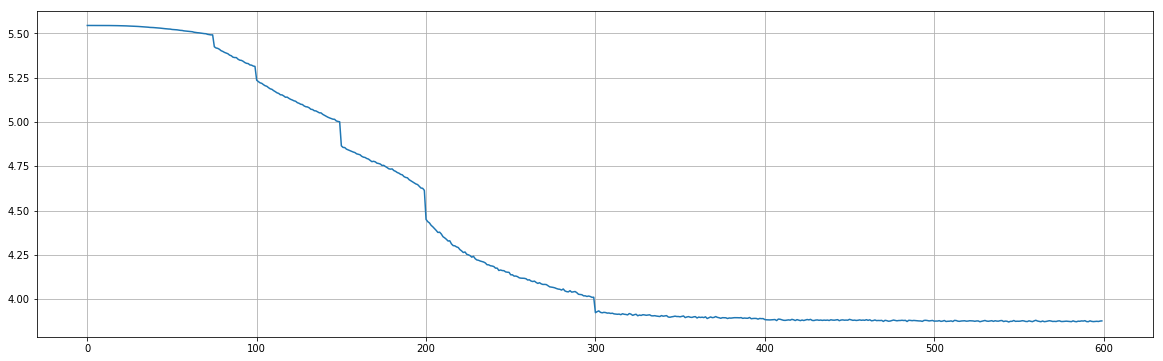

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(loss_hist)
plt.grid(True)
plt.show()

In [5]:
gumbel_matrix = weight_feature.detach().max(dim=1)[1]
labels_true = y
labels_pred = gumbel_matrix.data.numpy()

print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred))
print('Modularity of such partition for karate is %.3f' %get_modularity(G, labels_pred))

adjusted_rand_score 0.5413568683493947
normalized_mutual_info_score 0.6872628843326487
homogeneity_score 1.0
completeness_score 0.5235342827823282
v_measure_score 0.6872628843326488
Calculating modularity for undirected graph
Modularity of such partition for karate is 0.420


/opt/anaconda/envs/Deepak/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


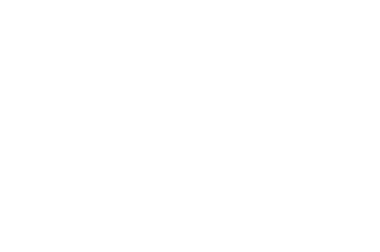

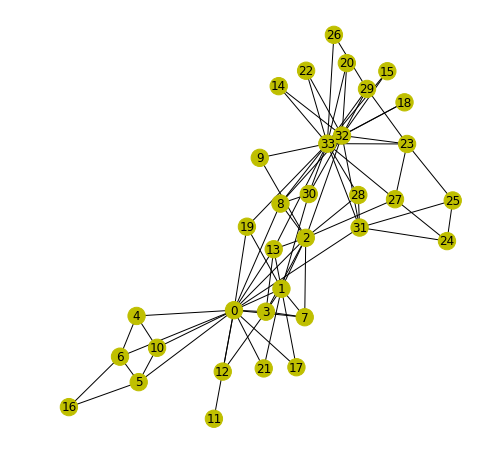

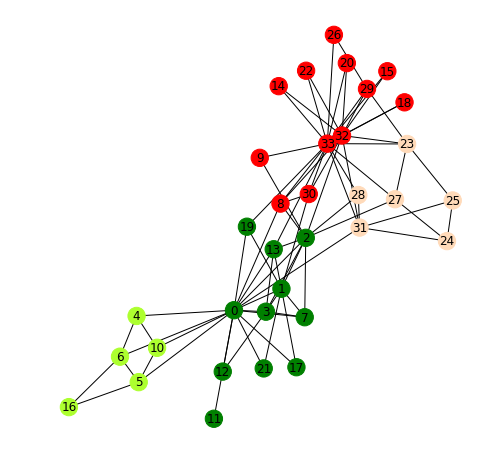

In [6]:
import numpy as np

import matplotlib.pyplot as plt
pos = nx.spring_layout(G)

color = []
for node in G.nodes:
    if G.node[node]['club'] == 'Mr. Hi':
        color.append('y')
    elif G.node[node]['club'] == 'Officer':
        color.append('y')

plt.axis('off')
plt.figure(figsize=(6, 6))
nx.draw(G, pos=pos, node_size=300, node_color=color, with_labels=True)


color = []
for c in range(34):
    if(gumbel_matrix[c] == 0):
        color.append('r')
    elif(gumbel_matrix[c] == 1):
        color.append('g')
    elif(gumbel_matrix[c] == 2):
        color.append('peachpuff')
    elif(gumbel_matrix[c] == 3):
        color.append('greenyellow')
    elif(gumbel_matrix[c] == 4):
        color.append('aqua')
    elif(gumbel_matrix[c] == 5):
        color.append('lightcyan')
    elif(gumbel_matrix[c] == 6):
        color.append('thistle')
    elif(gumbel_matrix[c] == 7):
        color.append('gold')
    elif(gumbel_matrix[c] == 8):
        color.append('m')

#plt.subplot(212)
plt.axis('off')
plt.figure(figsize=(6, 6))
nx.draw(G, pos=pos, node_size=300, node_color=color, with_labels=True)
plt.show()

In [11]:
import networkx as nx
from karateclub import MNMF,DANMF,EdMot,GEMSEC,SCD

model3 = EdMot()
model3.fit(G)
cluster_membership3 = model3.get_memberships()
clusters3 = cluster_membership3
labels_pred3 = list(clusters3.values())

print('Modularity of such partition for EdMot is %.6f' %get_modularity(G, labels_pred3))

Calculating modularity for undirected graph
Modularity of such partition for EdMot is 0.418803


In [12]:
model4 = GEMSEC(clusters=clusters_number)
model4.fit(G)
cluster_membership4 = model4.get_memberships()
clusters4 = cluster_membership4
labels_pred4 = list(clusters4.values())
print('Modularity of such partition for GEMSEC is %.6f' %get_modularity(G, labels_pred4))

Calculating modularity for undirected graph
Modularity of such partition for GEMSEC is 0.349523


In [7]:
model5 = SCD()
model5.fit(G)
cluster_membership5 = model5.get_memberships()
clusters5 = cluster_membership5
labels_pred5 = list(clusters5.values())
print('Modularity of such partition for SCD is %.6f' %get_modularity(G, labels_pred5))

Calculating modularity for undirected graph
Modularity of such partition for SCD is 0.301611


In [8]:
model1 = MNMF(clusters=2)
model1.fit(G)
cluster_membership1 = model1.get_memberships()
clusters1 = cluster_membership1
labels_pred1 = list(clusters1.values())
print('Modularity of such partition for MNMF is %.6f' %get_modularity(G, labels_pred1))

Calculating modularity for undirected graph
Modularity of such partition for MNMF is 0.253534


In [9]:
model2 = DANMF(layers=[16, 2])
model2.fit(G)
cluster_membership2 = model2.get_memberships()
clusters2 = cluster_membership2
labels_pred2 = list(clusters2.values())
print('Modularity of such partition for DANMF is %.6f' %get_modularity(G, labels_pred2))

Calculating modularity for undirected graph
Modularity of such partition for DANMF is 0.106180


In [14]:
import networkx as nx
from karateclub import MNMF,DANMF,EdMot,GEMSEC,SCD

labels_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

model1 = MNMF(clusters=4)
model1.fit(G)
cluster_membership1 = model1.get_memberships()
clusters1 = cluster_membership1
labels_pred1 = list(clusters1.values())

model2 = DANMF(layers=[16, 4])
model2.fit(G)
cluster_membership2 = model2.get_memberships()
clusters2 = cluster_membership2
labels_pred2 = list(clusters2.values())

model3 = EdMot()
model3.fit(G)
cluster_membership3 = model3.get_memberships()
clusters3 = cluster_membership3
labels_pred3 = list(clusters3.values())

model4 = GEMSEC(clusters=4)
model4.fit(G)
cluster_membership4 = model4.get_memberships()
clusters4 = cluster_membership4
labels_pred4 = list(clusters4.values())

model5 = SCD()
model5.fit(G)
cluster_membership5 = model5.get_memberships()
clusters5 = cluster_membership5
labels_pred5 = list(clusters5.values())

print('---------')

print('EDMOT')
print('---------')
print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred3))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred3))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred3))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred3))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred3))
print('---------')
print('---------')

print('GEMSE')
print('---------')
print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred4))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred4))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred4))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred4))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred4))

print('---------')
print('SCD')
print('---------')
print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred5))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred5))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred5))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred5))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred5))
print('---------')



print('---------')
print('MNMF')
print('---------')
print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred1))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred1))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred1))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred1))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred1))
print('---------')
print('---------')

print('DANMF')
print('---------')
print('adjusted_rand_score',adjusted_rand_score(labels_true, labels_pred2))
print('normalized_mutual_info_score',normalized_mutual_info_score(labels_true, labels_pred2))
print('homogeneity_score',metrics.homogeneity_score(labels_true, labels_pred2))
print('completeness_score',metrics.completeness_score(labels_true, labels_pred2))
print('v_measure_score',metrics.v_measure_score(labels_true, labels_pred2))

---------
EDMOT
---------
adjusted_rand_score 0.5131241441823687
normalized_mutual_info_score 0.6021446753032743
homogeneity_score 0.8535813201468536
completeness_score 0.4651322088408014
v_measure_score 0.6021446753032743
---------
---------
GEMSE
---------
adjusted_rand_score 0.39109073042908615
normalized_mutual_info_score 0.4441012848953674
homogeneity_score 0.6167628349284696
completeness_score 0.34696821213696877
v_measure_score 0.44410128489536743
---------
SCD
---------
adjusted_rand_score 0.24662813102119463
normalized_mutual_info_score 0.476050673650392
homogeneity_score 1.0000000000000007
completeness_score 0.3123795951868688
v_measure_score 0.47605067365039205
---------
---------
MNMF
---------
adjusted_rand_score 0.38873522755846107
normalized_mutual_info_score 0.5010381130740696
homogeneity_score 0.7496622933127495
completeness_score 0.3762541022397708
v_measure_score 0.5010381130740696
---------
---------
DANMF
---------
adjusted_rand_score 0.4782667256739336
normalized_